In [29]:
# Importações.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import yfinance as yf

In [30]:
# Carga dos dados.
petr3 = yf.download('PETR3.SA', start = '2015-01-01')

[*********************100%***********************]  1 of 1 completed


In [31]:
# Verificando os 5 primeiros elementos da base de dados.
petr3.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,9.58,9.67,9.00,9.00,4.747639,12710900
2015-01-05,8.64,8.96,8.25,8.27,4.362553,25730600
2015-01-06,8.28,8.53,7.78,8.06,4.251774,29754600
2015-01-07,8.30,8.51,8.08,8.45,4.457504,34128300
2015-01-08,8.60,9.26,8.52,9.02,4.758188,37487300


* Nossa base de dados começa em **`2015-01-02`**.

In [32]:
# Verificando os 5 últimos elementos de nossa base de dados.
petr3.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-09-13,34.799999,35.310001,34.090000,34.259998,34.259998,25361200
2022-09-14,34.320000,35.189999,34.200001,34.680000,34.680000,11926000
2022-09-15,34.360001,34.880001,34.349998,34.599998,34.599998,9164700
2022-09-16,34.169998,34.580002,34.000000,34.410000,34.410000,34954800
2022-09-19,33.900002,35.029999,33.820000,34.820000,34.820000,24596800


* Nossa base de dados vai até **`2022-09-16`**.

In [33]:
# Verificando a quantidade de observações e atributos.
petr3.shape

(1918, 6)

* Há um total de **1917 registros** e **6 atributos**.
* Os registros correspondem aos dias de funcionamento da bolsa de valores de SP, ou seja, so há dados de dias da semana.

In [34]:
# Metadados dos dados.
petr3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1918 entries, 2015-01-02 to 2022-09-19
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1918 non-null   float64
 1   High       1918 non-null   float64
 2   Low        1918 non-null   float64
 3   Close      1918 non-null   float64
 4   Adj Close  1918 non-null   float64
 5   Volume     1918 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 104.9 KB


* Todos os atributos são do tipo numérico, especificamente do tipo **`contínuo`**, ou seja, valores reais.

In [35]:
# Verificando a existência de valores ausentes.
petr3.isnull().sum().sum()

0

* **Não há valores ausentes** em nossa base de dados.

In [36]:
# Resumo estatístico.
petr3.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1918.000000,1918.000000,1918.000000,1918.000000,1918.000000,1.918000e+03
mean,21.707810,22.071992,21.341361,21.696236,12.644111,1.515007e+07
std,8.317639,8.396702,8.233218,8.329368,6.411426,1.132672e+07
min,5.890000,5.990000,5.670000,5.910000,3.117616,0.000000e+00
25%,14.450000,14.702500,14.172500,14.422500,7.623916,8.281625e+06
50%,22.095000,22.485000,21.755000,22.115000,12.021601,1.258215e+07
75%,29.200001,29.600000,28.767500,29.185000,16.178091,1.846928e+07
max,40.250000,40.509998,39.439999,39.849998,38.270000,1.374106e+08


* O valor de fechamento mais alto registrado foi de **R$ 39,84**, e o mínimo **R$ 5,91**.
* O valor de abertura mais alto registrado foi de **R$ 40,25**, e o mínimo **R$ 5,89**.
* O valor de cotação mais alto que a ação chegou a ter em um dia foi de **R$ 40,50**, e o mais baixo de **R$ 5,99**.
* O valor de cotação mais baixo que a ação chegou a ter em um dia foi de **R$ 39,43**, e o mais baixo de **5,67**.

In [37]:
# Verificando a data na qual a ação teve o preço mais alto em seu fechamento.
petr3[(petr3['Close'] >= 39.84) & (petr3['Close'] <= 40)]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-09,39.740002,40.099998,39.439999,39.849998,32.964211,16911500


* **`2022/08/09`** foi o momento em que a ação alcançou o preço mais alto em seu fechamento.

In [38]:
# Verificando a data na qual a ação teve o preço mais baixo em seu fechamento.
petr3[(petr3['Close'] >= 5.85) & (petr3['Close'] < 6.00)]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-20,5.93,5.99,5.67,5.93,3.128166,12696100
2016-01-26,6.10,6.24,5.86,5.96,3.143991,13040400
2016-02-11,5.89,6.05,5.78,5.91,3.117616,12812600


* **`2016/02/11`** foi o momento em que a ação alcançou o preço mais baixo em seu fechamento.

In [39]:
# Criando o atributo `price_var`, para noção da variação do preço no dia em questão.
petr3['price_var'] = petr3['High'] - petr3['Low']
petr3.head()

,Open,High,Low,Close,Adj Close,Volume,price_var
Date,,,,,,,
2015-01-02,9.58,9.67,9.00,9.00,4.747639,12710900,0.67
2015-01-05,8.64,8.96,8.25,8.27,4.362553,25730600,0.71
2015-01-06,8.28,8.53,7.78,8.06,4.251774,29754600,0.75
2015-01-07,8.30,8.51,8.08,8.45,4.457504,34128300,0.43
2015-01-08,8.60,9.26,8.52,9.02,4.758188,37487300,0.74


In [40]:
# Calculando o valor médio da variação.
petr3['price_var'].mean()

0.7306308604629246

* Em média a ação sofria uma volatilidade/variação de **R$ 0,73** em seu preço por dia.

In [41]:
# Criando uma função para salavar o dataframe em formato csv.
opcao = input('Deseja salvar o DataFrame em formato csv? [s/n]: ')

if opcao == 's':
    petr3.to_csv('petr3.csv')
else:
    print('Caso mude de ideia, execute a célula novamente !')    

Caso mude de ideia, execute a célula novamente !


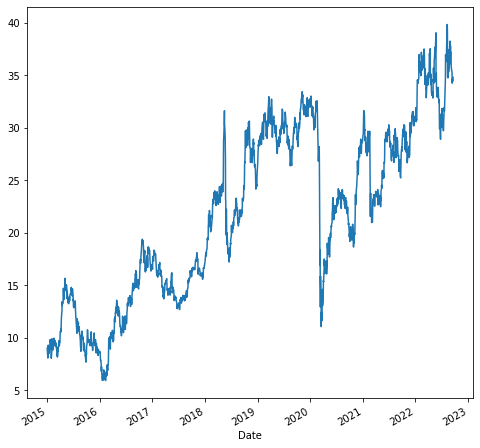

In [42]:
# Plotando o histórico de fechamento da ação.
plt.figure(figsize = (8, 8));
petr3['Close'].plot();

* Em 2020, provavelmente devido a pândemia, a ação teve uma grande desvalorização.

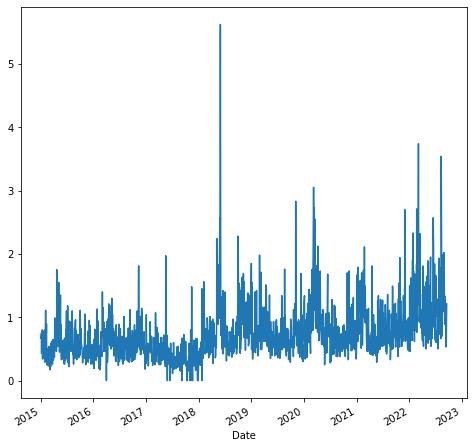

In [43]:
# Plotando a variação de preço histórica.
plt.figure(figsize = (8, 8));
petr3['price_var'].plot();

* O preço da ação **não apresenta** uma estabilidade em seu preço, havendo certos momentos em que há picos de volatilidade/variação.
* Oque é perfeitamente compreensivo ! 

In [44]:
# Criando uma lista com conjunto de diferentes ações.
acoes = ['ABEV3.SA','BBAS3.SA','ITSA3.SA','VALE3.SA',]

As ações escolhidas correspondem a:
* **Ambev, Banco do Brasil, Itaúsa e Vale**.

In [45]:
# Carga de dados.
acoes = yf.download(acoes, start = '2015-01-01')['Close']

[*********************100%***********************]  4 of 4 completed


* A busca será feita pelo **preço de fechamento** das ações.

In [46]:
# Visualizando os 5 primeiros registros.
acoes.head()

,ABEV3.SA,BBAS3.SA,ITSA3.SA,VALE3.SA
Date,,,,
2015-01-02,16.020000,22.650000,6.630748,21.280001
2015-01-05,15.730000,22.180000,6.525498,20.959999
2015-01-06,16.330000,22.490000,6.658815,21.799999
2015-01-07,16.559999,23.480000,6.834232,22.600000
2015-01-08,16.540001,23.559999,6.876332,22.840000


In [47]:
# Visualizando os 5 últimos registros.
acoes.tail()

,ABEV3.SA,BBAS3.SA,ITSA3.SA,VALE3.SA
Date,,,,
2022-09-13,15.59,40.220001,9.47,68.250000
2022-09-14,15.38,40.259998,9.47,67.000000
2022-09-15,15.30,39.849998,9.45,68.349998
2022-09-16,15.27,39.400002,9.39,68.250000
2022-09-19,15.47,40.180000,9.67,70.459999


In [48]:
# Verificando a quantidade de observações e atributos.
acoes.shape

(1919, 4)

* Há um total de **1918 registros** e **4 atributos**.

In [49]:
# Verificando a existência de valores ausentes na base de dados.
acoes.isnull().sum().sum()

4

In [50]:
# Removendo os valores nulos/ausentes.
acoes.dropna(inplace = True)

In [51]:
# Criando uma função para salavar o dataframe em formato csv.
opcao = input('Deseja salvar o DataFrame em formato csv? [s/n]: ')

if opcao == 's':
    acoes.to_csv('acoes.csv')
else:
    print('Caso mude de ideia, execute a célula novamente !')    

Caso mude de ideia, execute a célula novamente !


In [52]:
# Resumo estatístico.
acoes.describe()

,ABEV3.SA,BBAS3.SA,ITSA3.SA,VALE3.SA
count,1918.000000,1918.000000,1918.000000,1918.000000
mean,17.506387,32.447565,9.533849,48.923707
std,2.480207,9.723704,2.351622,27.223960
min,11.030000,12.700000,4.897239,8.600000
25%,15.652500,26.620001,7.314560,26.100000
50%,17.969999,31.865001,9.723809,47.850000
75%,19.097500,37.037499,11.148097,62.222500
max,24.270000,55.180000,15.780952,118.720001


* As empresas `ABEV3` e `ITSA3` são aquelas que possuem a **menor variação** histórica de preço.
* `VALE3` é aquela que tem a **maior variação** em seu preço histórico, bem como a compania com o preço mais caro por ação **R$ 118,72**.
*  `ITSA3` teve o menor preço histórico registrado no valor de **R$ 4,89**.

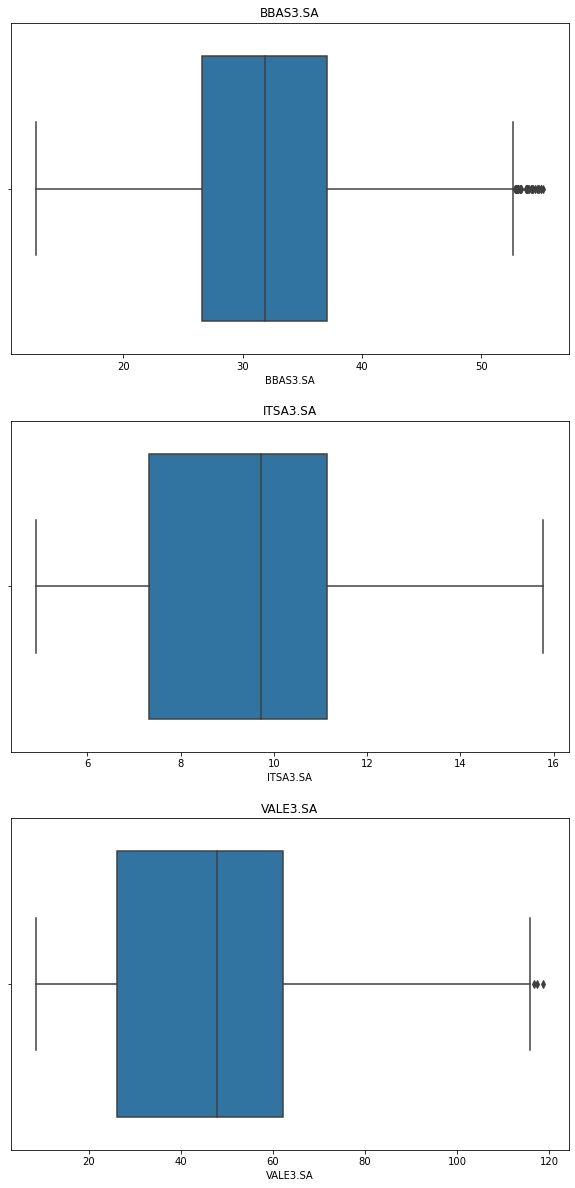

In [53]:
# Plotando o gráfico de caixa para cada ação.
plt.figure(figsize = (10, 50));
for i in range(1, len(acoes.columns)):
    plt.subplot(7, 1, i + 1);
    sns.boxplot(x = acoes[acoes.columns[i]]);
    plt.title(acoes.columns[i]);


In [54]:
# Normalizando os valores para compararmos as ações que apresentaram maior rentabilidade.
acoesn = acoes.copy()
for acao in acoes.columns:
  acoesn[acao] = acoesn[acao] / acoesn[acao][0]

In [55]:
# Visualizando os dados.
acoesn

,ABEV3.SA,BBAS3.SA,ITSA3.SA,VALE3.SA
Date,,,,
2015-01-02,1.000000,1.000000,1.000000,1.000000
2015-01-05,0.981898,0.979249,0.984127,0.984962
2015-01-06,1.019351,0.992936,1.004233,1.024436
2015-01-07,1.033708,1.036645,1.030688,1.062030
2015-01-08,1.032459,1.040177,1.037037,1.073308
...,...,...,...,...
2022-09-13,0.973159,1.775718,1.428195,3.207237
2022-09-14,0.960050,1.777483,1.428195,3.148496
2022-09-15,0.955056,1.759382,1.425179,3.211936


In [56]:
# Resetando o indíce do DataFrame para que consiguamos plotar e utilizar o atributo Date como eixo.
acoesn.reset_index(inplace = True)

* Se fizer a gravação e importação dos dados em csv, não tera de resetar o indíce !

In [57]:
# Plotando a evolução de rentabilidade histórica.
fig = px.line(title = 'Preço histórico das ações')
for i in acoesn.columns[1:]:
  fig.add_scatter(x = acoesn['Date'], y = acoesn[i], name = i)
fig.show() 